## Import Library

In [41]:

import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

# for resampling


#random forest
from sklearn.ensemble import RandomForestClassifier

#for model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Cluster
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [42]:
# pip installl tensorflow

# Import Data

In [43]:
df = pd.read_excel('credit_customers.xlsx')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


### EDA

### Information of dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Deskripsi Statistika

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


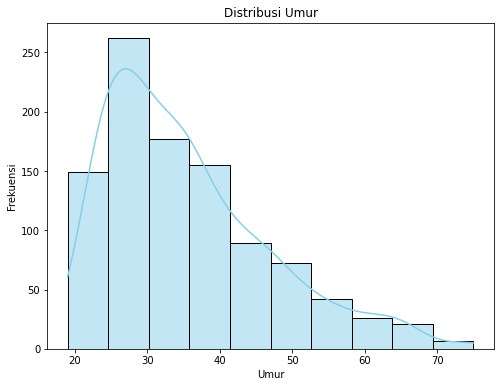

In [46]:
# Contoh visualisasi: Distribusi umur
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [47]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [48]:
# Menggunakan value_counts() dan for loop
columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties',
           'property_magnitude', 'other_payment_plans','housing', 'job', 'own_telephone', 'foreign_worker', 'class']

for column in columns:
    value_counts = df[column].value_counts()
    print(f"Jumlah kategori untuk kolom '{column}':")
    for category, count in value_counts.items():
        print(f"{category}: {count}")
    print()

Jumlah kategori untuk kolom 'checking_status':
no checking: 394
<0: 274
0<=X<200: 269
>=200: 63

Jumlah kategori untuk kolom 'credit_history':
existing paid: 530
critical/other existing credit: 293
delayed previously: 88
all paid: 49
no credits/all paid: 40

Jumlah kategori untuk kolom 'purpose':
radio/tv: 280
new car: 234
furniture/equipment: 181
used car: 103
business: 97
education: 50
repairs: 22
domestic appliance: 12
other: 12
retraining: 9

Jumlah kategori untuk kolom 'savings_status':
<100: 603
no known savings: 183
100<=X<500: 103
500<=X<1000: 63
>=1000: 48

Jumlah kategori untuk kolom 'employment':
1<=X<4: 339
>=7: 253
4<=X<7: 174
<1: 172
unemployed: 62

Jumlah kategori untuk kolom 'personal_status':
male single: 548
female div/dep/mar: 310
male mar/wid: 92
male div/sep: 50

Jumlah kategori untuk kolom 'other_parties':
none: 907
guarantor: 52
co applicant: 41

Jumlah kategori untuk kolom 'property_magnitude':
car: 332
real estate: 282
life insurance: 232
no known property: 154

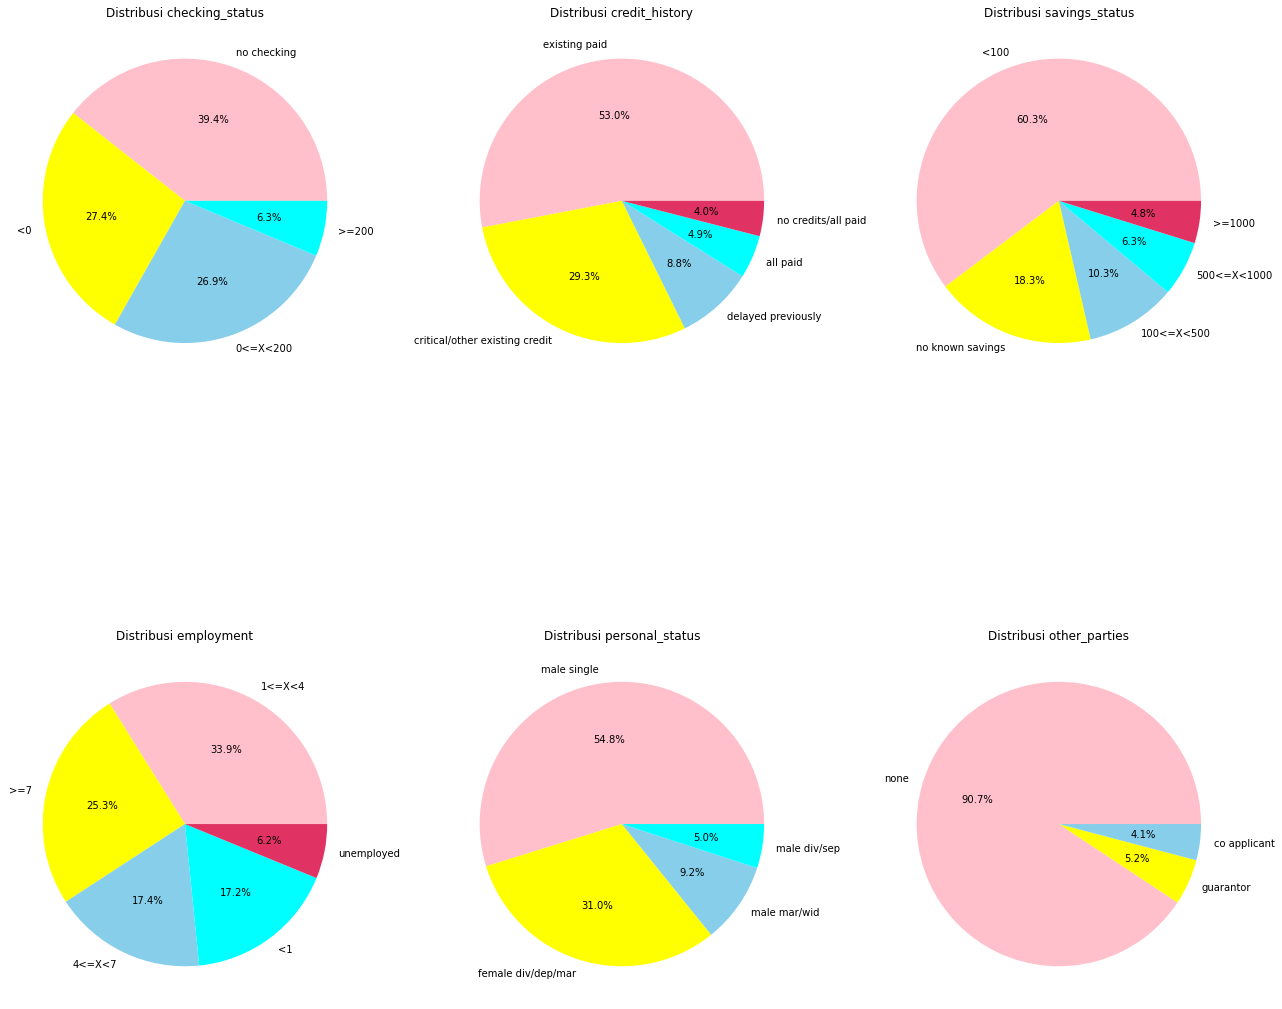

In [49]:
# Visualisasi Pie Plot
columns = ['checking_status', 'credit_history', 'savings_status', 'employment',
           'personal_status', 'other_parties']

plt.figure(figsize=(18, 20))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                   colors=['pink', 'yellow', 'skyblue', 'cyan', '#e03364'])
    plt.title(f'Distribusi {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

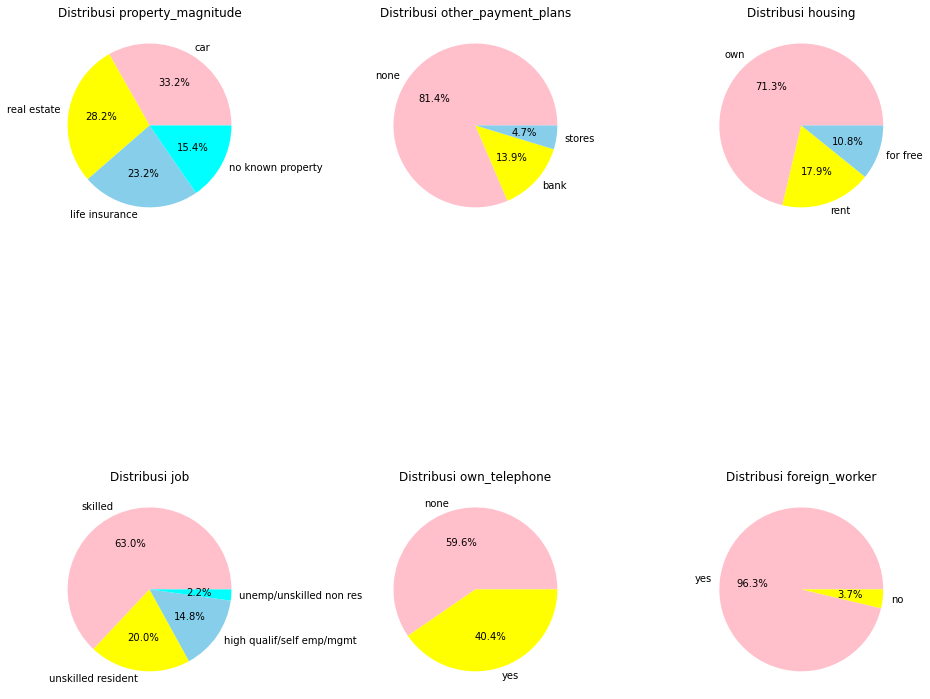

In [50]:
# Visualisasi Pie Plot
columns = ['property_magnitude', 'other_payment_plans','housing', 'job', 'own_telephone', 'foreign_worker']

plt.figure(figsize=(13, 15))
for i, column in enumerate(columns, start=1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'yellow', 'skyblue', 'cyan', '#e03364'])
    plt.title(f'Distribusi {column}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

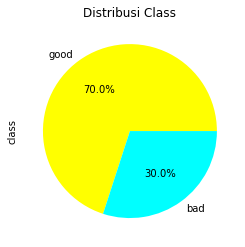

In [51]:
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'cyan'])
plt.title(f'Distribusi Class')
plt.show()

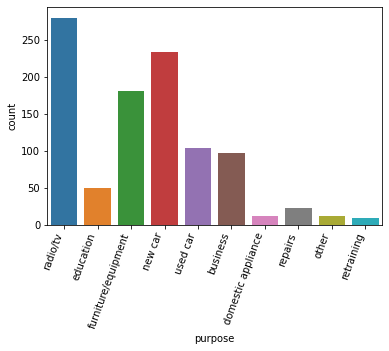

In [52]:
sns.countplot(x = df.purpose)
plt.xticks(rotation=70, ha='right') 
plt.show()

## Visualisasi Data Numerik

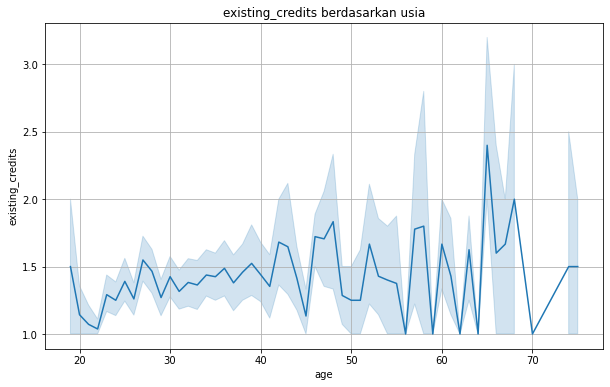

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='existing_credits')
plt.title('existing_credits berdasarkan usia')
plt.xlabel('age')
plt.ylabel('existing_credits')
plt.grid(True)
plt.show()

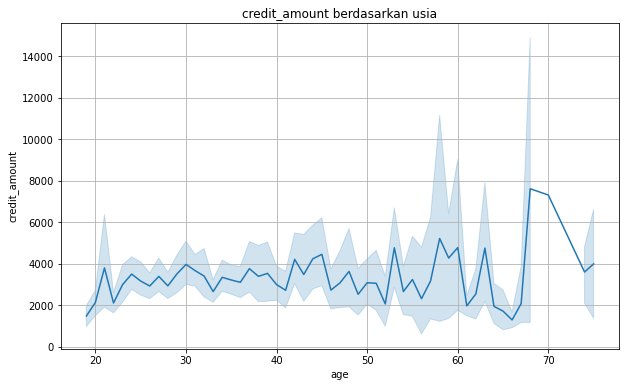

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='credit_amount')
plt.title('credit_amount berdasarkan usia')
plt.xlabel('age')
plt.ylabel('credit_amount')
plt.grid(True)
plt.show()

## Binning


In [55]:
# Menggabungkan kategori <0, 0<=X<200, >=200 menjadi kategori 'checking'
df['checking_status'] = df['checking_status'].replace({'<0': 'checking',
                                                       '0<=X<200': 'checking', '>=200': 'checking'})

# Verifikasi perubahan
df['checking_status'].value_counts()

checking       606
no checking    394
Name: checking_status, dtype: int64

In [56]:
# Menggabungkan kategori no credits/all paid menjadi kategori 'all paid'
df['credit_history'] = df['credit_history'].replace({'no credits/all paid': 'all paid'})

# Verifikasi perubahan
df['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
all paid                           89
delayed previously                 88
Name: credit_history, dtype: int64

In [57]:
# Menggabungkan kategori '<100','100<=X<500', '500<=X<1000','>=1000' 
# menjadi kategori there are known savings
df['savings_status'] = df['savings_status'].replace({'<100': 'there are known savings',
                                                     '100<=X<500': 'there are known savings', 
                                                     '500<=X<1000': 'there are known savings',
                                                     '>=1000': 'there are known savings'})

# Verifikasi perubahan
df['savings_status'].value_counts()

there are known savings    817
no known savings           183
Name: savings_status, dtype: int64

In [58]:
# Menggabungkan kategori '1<=X<4', '>=7',  '4<=X<7', '<1' menjadi kategori'working'
df['employment'] = df['employment'].replace({'1<=X<4': 'working', '>=7': 'working',
                                             '4<=X<7': 'working', '<1': 'working'})

# Verifikasi perubahan
df['employment'].value_counts()

working       938
unemployed     62
Name: employment, dtype: int64

In [59]:
# Menggabungkan kategori 'male single' menjadi kategori 'single'dan 
# dan  'female div/dep/mar','male div/sep', 'male mar/wid' menjadi kategori 'married'
df['personal_status'] = df['personal_status'].replace(
    {'male single': 'single', 'female div/dep/mar': 'married',  'male div/sep': 'married',
     'male mar/wid': 'married'})

# Verifikasi perubahan
df['personal_status'].value_counts()

single     548
married    452
Name: personal_status, dtype: int64

In [60]:
df['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [61]:
# Menggabungkan kategori 'unskilled resident' , 'unemp/unskilled non res' menjadi kategori 'unskilled', 
# Dan kategori high qualif/self emp/mgmt'menjadi 'skilled'
                              
df['job'] = df['job'].replace({'unskilled resident': 'unskilled',
                               'high qualif/self emp/mgmt': 'skilled',
                               'unemp/unskilled non res': 'unskilled'})

# Verifikasi perubahan
df['job'].value_counts()

skilled      778
unskilled    222
Name: job, dtype: int64

### Check Missing Value

In [62]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### Check Duplicated data

In [63]:
df.duplicated().sum()

0

In [64]:
df.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


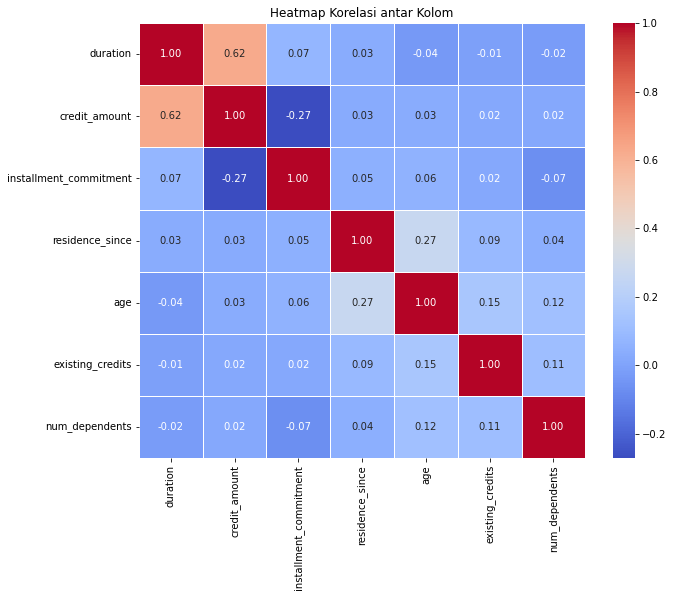

In [65]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Kolom')
plt.show()

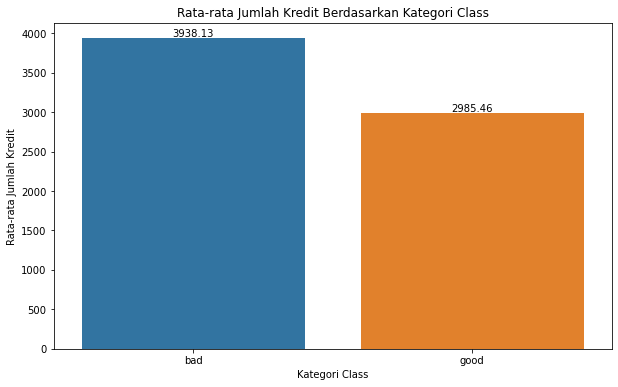

In [66]:
# Agregasi data
avg_credit_mount = df.groupby('class')['credit_amount'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=avg_credit_mount, x='class', y='credit_amount')
plt.title('Rata-rata Jumlah Kredit Berdasarkan Kategori Class')
plt.xlabel('Kategori Class')
plt.ylabel('Rata-rata Jumlah Kredit')

# Tambahkan teks jumlah di setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 5), 
                      textcoords = 'offset points')

plt.show()

In [67]:
avg_credit_mount

,class,credit_amount
0,bad,3938.126667
1,good,2985.457143


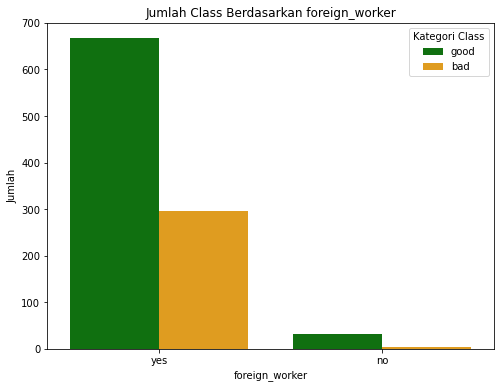

In [68]:
# Plot countplot
color = ['green', 'orange']
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='foreign_worker', hue='class', palette=color)
plt.title('Jumlah Class Berdasarkan foreign_worker')
plt.xlabel('foreign_worker')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Class')
plt.show()

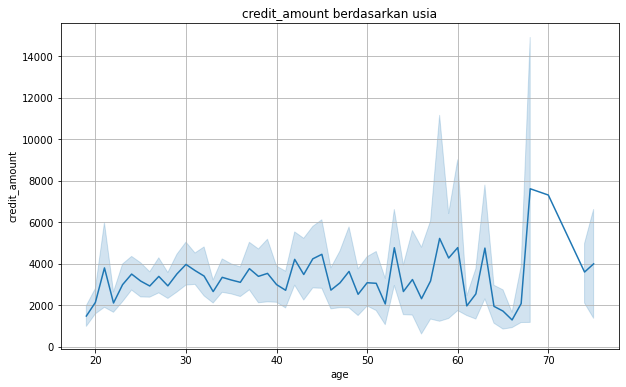

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='credit_amount')
plt.title('credit_amount berdasarkan usia')
plt.xlabel('age')
plt.ylabel('credit_amount')
plt.grid(True)
plt.show()

### Check Imbalance

In [70]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [71]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

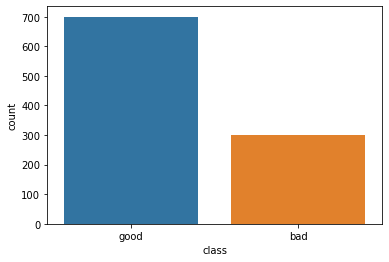

In [72]:
sns.countplot(x=df['class'])
plt.show()

In [73]:
columns = ['purpose', 'property_magnitude', 'other_payment_plans', 'foreign_worker']

df = df.drop(columns=columns)
df

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,checking,6.0,critical/other existing credit,1169.0,no known savings,working,4.0,single,none,4.0,67.0,own,2.0,skilled,1.0,yes,good
1,checking,48.0,existing paid,5951.0,there are known savings,working,2.0,married,none,2.0,22.0,own,1.0,skilled,1.0,none,bad
2,no checking,12.0,critical/other existing credit,2096.0,there are known savings,working,2.0,single,none,3.0,49.0,own,1.0,unskilled,2.0,none,good
3,checking,42.0,existing paid,7882.0,there are known savings,working,2.0,single,guarantor,4.0,45.0,for free,1.0,skilled,2.0,none,good
4,checking,24.0,delayed previously,4870.0,there are known savings,working,3.0,single,none,4.0,53.0,for free,2.0,skilled,2.0,none,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,1736.0,there are known savings,working,3.0,married,none,4.0,31.0,own,1.0,unskilled,1.0,none,good
996,checking,30.0,existing paid,3857.0,there are known savings,working,4.0,married,none,4.0,40.0,own,1.0,skilled,1.0,yes,good
997,no checking,12.0,existing paid,804.0,there are known savings,working,4.0,single,none,4.0,38.0,own,1.0,skilled,1.0,none,good
998,checking,45.0,existing paid,1845.0,there are known savings,working,4.0,single,none,4.0,23.0,for free,1.0,skilled,1.0,yes,bad


## TRANSPOSE DATA

In [74]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
checking_status,checking,checking,no checking,checking,checking,no checking,no checking,checking,no checking,checking,...,no checking,no checking,checking,checking,no checking,no checking,checking,no checking,checking,checking
duration,6.0,48.0,12.0,42.0,24.0,36.0,24.0,36.0,12.0,30.0,...,12.0,15.0,18.0,36.0,12.0,12.0,30.0,12.0,45.0,45.0
credit_history,critical/other existing credit,existing paid,critical/other existing credit,existing paid,delayed previously,existing paid,existing paid,existing paid,existing paid,critical/other existing credit,...,critical/other existing credit,all paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,existing paid,critical/other existing credit
credit_amount,1169.0,5951.0,2096.0,7882.0,4870.0,9055.0,2835.0,6948.0,3059.0,5234.0,...,3565.0,1569.0,1936.0,3959.0,2390.0,1736.0,3857.0,804.0,1845.0,4576.0
savings_status,no known savings,there are known savings,there are known savings,there are known savings,there are known savings,no known savings,there are known savings,there are known savings,there are known savings,there are known savings,...,no known savings,there are known savings,no known savings,there are known savings,no known savings,there are known savings,there are known savings,there are known savings,there are known savings,there are known savings
employment,working,working,working,working,working,working,working,working,working,unemployed,...,working,working,working,unemployed,working,working,working,working,working,unemployed
installment_commitment,4.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,...,2.0,4.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
personal_status,single,married,single,single,single,single,single,single,married,married,...,single,single,married,single,single,married,married,single,single,single
other_parties,none,none,none,guarantor,none,none,none,none,none,none,...,none,none,none,none,none,none,none,none,none,none
residence_since,4.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,...,1.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0


## Label Encoder

In [75]:
# Inisialisasi LabelEncoder
columns = ['checking_status', 'credit_history', 'employment', 'personal_status', 'job', 'own_telephone', 'savings_status', 'housing', 'other_parties','class']
label_encoder = LabelEncoder()

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

In [76]:
df

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,0,6.0,1,1169.0,0,1,4.0,1,2,4.0,67.0,1,2.0,0,1.0,1,1
1,0,48.0,3,5951.0,1,1,2.0,0,2,2.0,22.0,1,1.0,0,1.0,0,0
2,1,12.0,1,2096.0,1,1,2.0,1,2,3.0,49.0,1,1.0,1,2.0,0,1
3,0,42.0,3,7882.0,1,1,2.0,1,1,4.0,45.0,0,1.0,0,2.0,0,1
4,0,24.0,2,4870.0,1,1,3.0,1,2,4.0,53.0,0,2.0,0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12.0,3,1736.0,1,1,3.0,0,2,4.0,31.0,1,1.0,1,1.0,0,1
996,0,30.0,3,3857.0,1,1,4.0,0,2,4.0,40.0,1,1.0,0,1.0,1,1
997,1,12.0,3,804.0,1,1,4.0,1,2,4.0,38.0,1,1.0,0,1.0,0,1
998,0,45.0,3,1845.0,1,1,4.0,1,2,4.0,23.0,0,1.0,0,1.0,1,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int32  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int32  
 3   credit_amount           1000 non-null   float64
 4   savings_status          1000 non-null   int32  
 5   employment              1000 non-null   int32  
 6   installment_commitment  1000 non-null   float64
 7   personal_status         1000 non-null   int32  
 8   other_parties           1000 non-null   int32  
 9   residence_since         1000 non-null   float64
 10  age                     1000 non-null   float64
 11  housing                 1000 non-null   int32  
 12  existing_credits        1000 non-null   float64
 13  job                     1000 non-null   int32  
 14  num_dependents          1000 non-null   f

In [124]:
# Mengubah kolom-kolom tertentu menjadi tipe data float
df['checking_status'] = df['checking_status'].astype(float)
df['credit_history'] = df['credit_history'].astype(float)
df['savings_status'] = df['savings_status'].astype(float)
df['employment'] = df['employment'].astype(float)
df['personal_status'] = df['personal_status'].astype(float)
df['other_parties'] = df['other_parties'].astype(float)
df['housing'] = df['housing'].astype(float)
df['job'] = df['job'].astype(float)
df['own_telephone'] = df['own_telephone'].astype(float)
df['class'] = df['class'].astype(float)

In [125]:
df

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,0.0,-1.236478,1.0,-0.745131,0.0,1.0,4.0,1.0,2.0,4.0,2.766456,1.0,2.0,0.0,1.0,1.0,1.0
1,0.0,2.248194,3.0,0.949817,1.0,1.0,2.0,0.0,2.0,2.0,-1.191404,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,-0.738668,1.0,-0.416562,1.0,1.0,2.0,1.0,2.0,3.0,1.183312,1.0,1.0,1.0,2.0,0.0,1.0
3,0.0,1.750384,3.0,1.634247,1.0,1.0,2.0,1.0,1.0,4.0,0.831502,0.0,1.0,0.0,2.0,0.0,1.0
4,0.0,0.256953,2.0,0.566664,1.0,1.0,3.0,1.0,2.0,4.0,1.535122,0.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-0.738668,3.0,-0.544162,1.0,1.0,3.0,0.0,2.0,4.0,-0.399832,1.0,1.0,1.0,1.0,0.0,1.0
996,0.0,0.754763,3.0,0.207612,1.0,1.0,4.0,0.0,2.0,4.0,0.391740,1.0,1.0,0.0,1.0,1.0,1.0
997,1.0,-0.738668,3.0,-0.874503,1.0,1.0,4.0,1.0,2.0,4.0,0.215835,1.0,1.0,0.0,1.0,0.0,1.0
998,0.0,1.999289,3.0,-0.505528,1.0,1.0,4.0,1.0,2.0,4.0,-1.103451,0.0,1.0,0.0,1.0,1.0,0.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   float64
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   float64
 3   credit_amount           1000 non-null   float64
 4   savings_status          1000 non-null   float64
 5   employment              1000 non-null   float64
 6   installment_commitment  1000 non-null   float64
 7   personal_status         1000 non-null   float64
 8   other_parties           1000 non-null   float64
 9   residence_since         1000 non-null   float64
 10  age                     1000 non-null   float64
 11  housing                 1000 non-null   float64
 12  existing_credits        1000 non-null   float64
 13  job                     1000 non-null   float64
 14  num_dependents          1000 non-null   f

# Scaling

In [127]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'personal_status', 'other_parties', 'residence_since', 'age', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone', 'class'],
      dtype='object')

In [128]:
columns = ['duration', 'credit_amount', 'age']
scaler = StandardScaler()
df_scale = scaler.fit_transform(df[columns])

In [129]:
df[columns]=df_scale

In [130]:
df

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,0.0,-1.236478,1.0,-0.745131,0.0,1.0,4.0,1.0,2.0,4.0,2.766456,1.0,2.0,0.0,1.0,1.0,1.0
1,0.0,2.248194,3.0,0.949817,1.0,1.0,2.0,0.0,2.0,2.0,-1.191404,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,-0.738668,1.0,-0.416562,1.0,1.0,2.0,1.0,2.0,3.0,1.183312,1.0,1.0,1.0,2.0,0.0,1.0
3,0.0,1.750384,3.0,1.634247,1.0,1.0,2.0,1.0,1.0,4.0,0.831502,0.0,1.0,0.0,2.0,0.0,1.0
4,0.0,0.256953,2.0,0.566664,1.0,1.0,3.0,1.0,2.0,4.0,1.535122,0.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-0.738668,3.0,-0.544162,1.0,1.0,3.0,0.0,2.0,4.0,-0.399832,1.0,1.0,1.0,1.0,0.0,1.0
996,0.0,0.754763,3.0,0.207612,1.0,1.0,4.0,0.0,2.0,4.0,0.391740,1.0,1.0,0.0,1.0,1.0,1.0
997,1.0,-0.738668,3.0,-0.874503,1.0,1.0,4.0,1.0,2.0,4.0,0.215835,1.0,1.0,0.0,1.0,0.0,1.0
998,0.0,1.999289,3.0,-0.505528,1.0,1.0,4.0,1.0,2.0,4.0,-1.103451,0.0,1.0,0.0,1.0,1.0,0.0


In [131]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df.drop(columns='class')
y = df['class']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Ubah hasil resampling menjadi DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['class'] = y_resampled

df_resampled

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,0.0,-1.236478,1.0,-0.745131,0.0,1.0,4.0,1.0,2.0,4.0,2.766456,1.0,2.0,0.0,1.0,1.0,1.0
1,0.0,2.248194,3.0,0.949817,1.0,1.0,2.0,0.0,2.0,2.0,-1.191404,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,-0.738668,1.0,-0.416562,1.0,1.0,2.0,1.0,2.0,3.0,1.183312,1.0,1.0,1.0,2.0,0.0,1.0
3,0.0,1.750384,3.0,1.634247,1.0,1.0,2.0,1.0,1.0,4.0,0.831502,0.0,1.0,0.0,2.0,0.0,1.0
4,0.0,0.256953,2.0,0.566664,1.0,1.0,3.0,1.0,2.0,4.0,1.535122,0.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,-0.738668,0.0,-0.766752,1.0,1.0,4.0,1.0,2.0,3.0,-0.663689,1.0,2.0,0.0,1.0,0.0,0.0
1396,0.0,-0.240857,3.0,-0.728473,1.0,1.0,4.0,0.0,2.0,3.0,-1.103451,2.0,1.0,0.0,1.0,1.0,0.0
1397,0.0,1.999289,1.0,0.522713,1.0,1.0,4.0,1.0,2.0,2.0,-0.927547,1.0,2.0,1.0,1.0,0.0,0.0
1398,0.0,1.252574,3.0,-0.198225,1.0,1.0,2.0,1.0,2.0,2.0,0.479693,1.0,1.0,0.0,2.0,0.0,0.0


# Splitting

In [132]:
X = df_resampled.drop(columns='class')
y = df_resampled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1120, 16), (280, 16), (1120,), (280,))

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1120, 16), (280, 16), (1120,), (280,))

In [134]:
print("Jumlah data training:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1120
Jumlah data test: 280


In [135]:
y_train

1121    0.0
48      1.0
155     0.0
306     1.0
1287    0.0
       ... 
1095    0.0
1130    0.0
1294    0.0
860     1.0
1126    0.0
Name: class, Length: 1120, dtype: float64

In [136]:
X_train

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone
1121,0.0,1.750384,3.0,1.383301,0.0,1.0,4.0,0.0,2.0,3.0,-0.487784,1.0,1.0,0.0,1.0,1.0
48,1.0,-0.821636,1.0,1.402441,1.0,1.0,1.0,1.0,2.0,4.0,0.303788,1.0,2.0,1.0,1.0,0.0
155,0.0,-0.738668,3.0,-0.705079,1.0,1.0,2.0,0.0,2.0,4.0,-1.367309,2.0,1.0,0.0,1.0,0.0
306,1.0,0.754763,3.0,0.545751,0.0,1.0,2.0,0.0,2.0,4.0,-1.015499,2.0,1.0,1.0,1.0,0.0
1287,0.0,-0.738668,0.0,-0.775968,1.0,1.0,4.0,1.0,2.0,4.0,1.095360,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.256953,3.0,-0.717839,1.0,1.0,4.0,1.0,2.0,2.0,-1.103451,1.0,1.0,1.0,1.0,0.0
1130,0.0,-0.240857,3.0,-0.728118,1.0,1.0,4.0,0.0,2.0,3.0,1.007407,1.0,1.0,1.0,1.0,1.0
1294,0.0,1.999289,3.0,-0.085158,1.0,1.0,4.0,1.0,1.0,4.0,-1.279356,2.0,1.0,0.0,1.0,0.0
860,1.0,0.256953,1.0,0.897714,1.0,1.0,4.0,1.0,2.0,2.0,-0.751642,1.0,2.0,0.0,1.0,0.0


# Cluster

# Analisis Clustering dengan Metode Hierarki



In [137]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [138]:
X1 = X[['duration', 'credit_amount']]
X1

,duration,credit_amount
0,-1.236478,-0.745131
1,2.248194,0.949817
2,-0.738668,-0.416562
3,1.750384,1.634247
4,0.256953,0.566664
...,...,...
1395,-0.738668,-0.766752
1396,-0.240857,-0.728473
1397,1.999289,0.522713
1398,1.252574,-0.198225


In [139]:
X1 = scaler.fit_transform(X1)
X1

array([[-1.29073111, -0.7466004 ],
       [ 2.12534619,  0.88583216],
       [-0.80272007, -0.43015017],
       ...,
       [ 1.88134067,  0.474481  ],
       [ 1.1493241 , -0.2198661 ],
       [ 1.1493241 ,  0.37787322]])

In [140]:
X1 = np.asanyarray(X1)
X1

array([[-1.29073111, -0.7466004 ],
       [ 2.12534619,  0.88583216],
       [-0.80272007, -0.43015017],
       ...,
       [ 1.88134067,  0.474481  ],
       [ 1.1493241 , -0.2198661 ],
       [ 1.1493241 ,  0.37787322]])

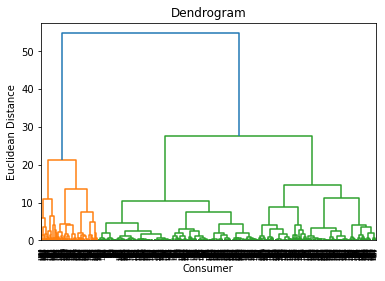

In [141]:
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat

dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

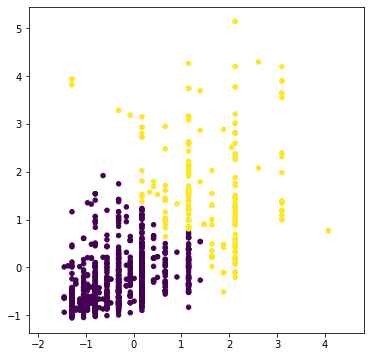

In [142]:
ahc = AgglomerativeClustering(n_clusters=2, linkage='ward')
label = ahc.fit_predict(X1)
                                        
plt.figure(figsize=(6,6))
plt.scatter(X1[:, 0], X1[:, 1], c=label, s=20)
plt.axis('equal');

In [143]:
from sklearn.metrics import silhouette_score

# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(X1, label)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5986752278539776


In [144]:
dataslicing = df.iloc[:,[1,3,5]].values
dataslicing = np.asarray(dataslicing)
print(dataslicing)

[[-1.23647786 -0.74513141  1.        ]
 [ 2.24819436  0.94981679  1.        ]
 [-0.73866754 -0.41656241  1.        ]
 ...
 [-0.73866754 -0.87450324  1.        ]
 [ 1.9992892  -0.50552769  1.        ]
 [ 1.9992892   0.46245715  0.        ]]


In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

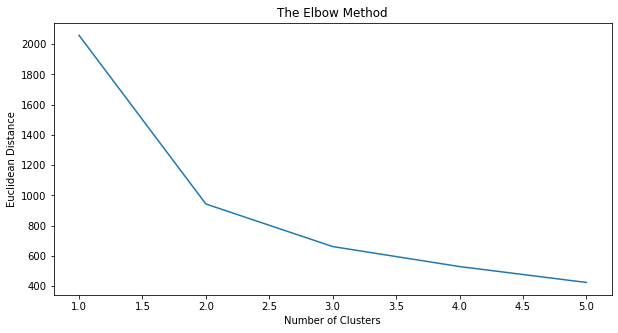

In [146]:
wcss=[]
for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    label=kmeans.fit_predict(dataslicing)

    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

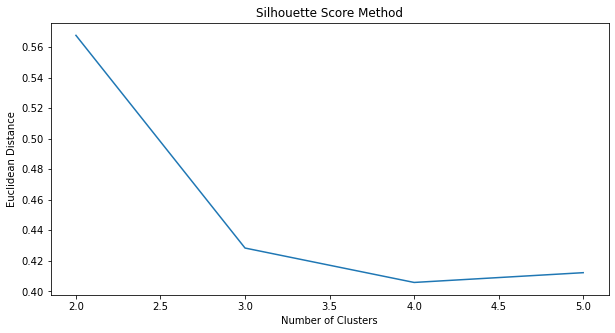

In [147]:
wcss=[]
for k in range(2,6):
    kmeans = KMeans(n_clusters=k)
    label=kmeans.fit_predict(dataslicing)

    siluet=silhouette_score(dataslicing, label, metric='euclidean')
    wcss.append(siluet)
plt.figure(figsize=(10,5))
plt.plot(range(2,6),wcss)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [148]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y=kmeans.fit_predict(dataslicing)

print(pred_y)

[0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [149]:
print('Silhouette Score:', silhouette_score(dataslicing, pred_y))

Silhouette Score: 0.568023724335823


In [150]:
data1 = pd.DataFrame(df, columns=['duration', 'credit_amount'])
data1['Cluster']=pred_y
print(data1)

     duration  credit_amount  Cluster
0   -1.236478      -0.745131        0
1    2.248194       0.949817        1
2   -0.738668      -0.416562        0
3    1.750384       1.634247        1
4    0.256953       0.566664        0
..        ...            ...      ...
995 -0.738668      -0.544162        0
996  0.754763       0.207612        0
997 -0.738668      -0.874503        0
998  1.999289      -0.505528        1
999  1.999289       0.462457        1

[1000 rows x 3 columns]


In [151]:
data1=pd.DataFrame(data1)
data1

,duration,credit_amount,Cluster
0,-1.236478,-0.745131,0
1,2.248194,0.949817,1
2,-0.738668,-0.416562,0
3,1.750384,1.634247,1
4,0.256953,0.566664,0
...,...,...,...
995,-0.738668,-0.544162,0
996,0.754763,0.207612,0
997,-0.738668,-0.874503,0
998,1.999289,-0.505528,1


In [152]:
# Memfilter data untuk cluster 0
cluster0 = data1[data1['Cluster'] == 0]

# Memfilter data untuk cluster 1
cluster1 = data1[data1['Cluster'] == 1]

# Menampilkan data cluster 0 dan cluster 1
print("Data untuk Cluster 0:")
print(cluster0.head())  # Menampilkan beberapa baris pertama dari cluster 0

print("\nData untuk Cluster 1:")
print(cluster1.head())  # Menampilkan beberapa baris pertama dari cluster 1

Data untuk Cluster 0:
   duration  credit_amount  Cluster
0 -1.236478      -0.745131        0
2 -0.738668      -0.416562        0
4  0.256953       0.566664        0
6  0.256953      -0.154629        0
8 -0.738668      -0.075233        0

Data untuk Cluster 1:
   duration  credit_amount  Cluster
1  2.248194       0.949817        1
3  1.750384       1.634247        1
5  1.252574       2.050009        1
7  1.252574       1.303197        1
9  0.754763       0.695681        1


In [153]:
cluster0=pd.DataFrame(cluster0.head(10))
cluster0

,duration,credit_amount,Cluster
0,-1.236478,-0.745131,0
2,-0.738668,-0.416562,0
4,0.256953,0.566664,0
6,0.256953,-0.154629,0
8,-0.738668,-0.075233,0
10,-0.738668,-0.700472,0
12,-0.738668,-0.604063,0
13,0.256953,-0.734498,0
14,-0.489762,-0.662192,0
15,0.256953,-0.705079,0


In [154]:
cluster1=pd.DataFrame(cluster1.head(10))
cluster1

,duration,credit_amount,Cluster
1,2.248194,0.949817,1
3,1.750384,1.634247,1
5,1.252574,2.050009,1
7,1.252574,1.303197,1
9,0.754763,0.695681,1
11,2.248194,0.367466,1
17,0.754763,1.701591,1
18,0.256953,3.299067,1
29,3.243815,1.263499,1
35,1.999289,0.522713,1


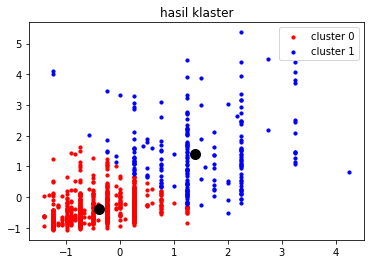

In [155]:
plt.scatter(dataslicing[pred_y==0,0],dataslicing[pred_y==0,1],
            s=10,c='red',label='cluster 0')
plt.scatter(dataslicing[pred_y==1,0],dataslicing[pred_y==1,1],
            s=10,c='blue',label='cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=100, c="black")
plt.title("hasil klaster")
plt.legend()
plt.show()

# Splitting

In [156]:

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=0)

In [157]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1134
Jumlah data validasi: 126
Jumlah data test: 140


In [158]:
y_train

1029    0.0
237     0.0
315     0.0
462     1.0
562     1.0
       ... 
518     1.0
519     1.0
675     1.0
1036    0.0
1343    0.0
Name: class, Length: 1134, dtype: float64

In [159]:
X_train

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone
1029,1.0,0.256953,3.0,0.467774,1.0,1.0,2.0,1.0,2.0,3.0,1.623075,1.0,3.0,0.0,1.0,1.0
237,0.0,0.008048,3.0,-0.178731,1.0,1.0,4.0,0.0,2.0,2.0,2.238742,2.0,2.0,1.0,1.0,0.0
315,0.0,1.252574,0.0,-0.186174,1.0,1.0,4.0,1.0,2.0,4.0,-0.399832,1.0,1.0,0.0,1.0,0.0
462,0.0,-0.738668,3.0,-0.090120,1.0,1.0,3.0,0.0,2.0,1.0,-0.135974,2.0,1.0,0.0,1.0,0.0
562,0.0,-1.236478,2.0,-0.917391,1.0,1.0,2.0,0.0,2.0,1.0,-0.575737,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.0,-1.236478,3.0,-0.733080,1.0,1.0,3.0,1.0,2.0,2.0,0.655598,1.0,1.0,0.0,1.0,1.0
519,1.0,-1.236478,1.0,-0.911365,0.0,1.0,4.0,1.0,2.0,4.0,0.039930,0.0,2.0,0.0,1.0,0.0
675,1.0,0.754763,1.0,0.446153,1.0,1.0,4.0,0.0,2.0,4.0,-0.839594,2.0,1.0,0.0,1.0,1.0
1036,0.0,0.256953,3.0,-0.323344,1.0,0.0,1.0,0.0,2.0,1.0,-0.223927,1.0,1.0,0.0,1.0,0.0


### KLASIFIKASI DECISION TREE

In [160]:
# Memilih model terbaik untuk pengujian lebih lanjut
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
y_pred = model.predict(X_train)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

## Evaluasi Model

In [162]:
# Evaluasi model terbaik
print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [163]:
print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       557
         1.0       1.00      1.00      1.00       577

    accuracy                           1.00      1134
   macro avg       1.00      1.00      1.00      1134
weighted avg       1.00      1.00      1.00      1134



In [164]:
print("Confusion Matrix:")
cm = confusion_matrix(y_train, y_pred)
cm

Confusion Matrix:


array([[557,   0],
       [  0, 577]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

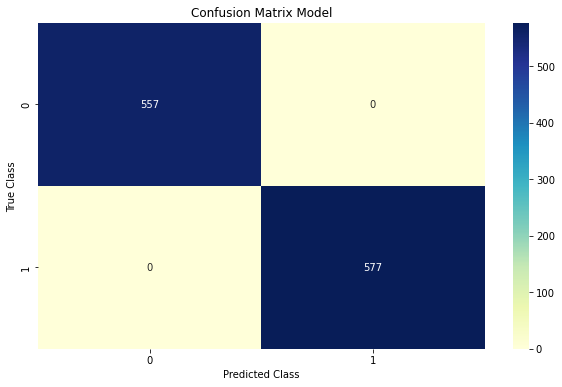

In [165]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

# KLASIFIKASI ANN

In [166]:
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=32) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=32) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1008, 16), (252, 16), (140, 16), (1008,), (252,), (140,))

In [205]:
columns = ['duration', 'credit_amount', 'age']
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train[columns])
X_test_scale = scaler.transform(X_test[columns])
X_val_scale = scaler.transform(X_val[columns])

In [206]:
X_train[columns]=X_train_scale
X_test[columns]=X_test_scale
X_val[columns]=X_val_scale

In [207]:
X_train

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone
432,0,-1.248104,1,-0.509202,1,0,4.0,1,2,4.0,0.093835,0,3.0,0,1.0,1
986,0,1.579970,0,1.012972,1,1,2.0,0,2,1.0,-0.167658,1,2.0,0,1.0,0
349,0,-1.012431,1,-0.762841,1,1,4.0,1,2,3.0,-0.254823,0,2.0,0,2.0,0
937,0,-1.248104,3,-0.443380,1,1,4.0,0,2,3.0,-0.429152,2,1.0,0,1.0,1
371,1,-0.305413,1,0.937501,1,1,3.0,1,2,4.0,-0.167658,1,2.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,-0.069740,1,3.215422,0,1,4.0,1,2,4.0,-0.429152,0,1.0,0,1.0,1
835,0,-0.776758,0,-0.781450,1,1,4.0,1,2,4.0,1.139809,1,2.0,0,1.0,0
1216,0,1.108624,3,0.630447,1,1,4.0,1,2,2.0,-0.516316,1,1.0,0,1.0,0
559,0,-0.305413,1,-0.489904,1,1,2.0,1,2,2.0,-0.341987,1,2.0,1,1.0,0


In [208]:
y_train = np_utils.to_categorical(y_train, num_classes = 5)
y_test = np_utils.to_categorical(y_test, num_classes = 5)
y_val = np_utils.to_categorical(y_val, num_classes = 5)

In [209]:
#Mendefinisikan Model CNN
def get_model_ann(batch_size, learning_rate, units, activation):
    model = Sequential()
    model.add(Dense(units = units, activation = activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units = units, activation = activation))
    model.add(Dense(5, activation='softmax')) 
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    
    # Early Stoping
    early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])
    return model

In [210]:
#Mendefinisikan Model 
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [16, 32, 64, 128],
             'learning_rate':[0.1, 0.01, 0.001],
             'units':[16, 32, 64, 128],
             'activation':['relu', 'tanh']}

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_45216/2659455672.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_ann = KerasClassifier(build_fn=get_model_ann)


In [211]:
ann = GridSearchCV(model_ann, param_grid=params_ann)
 
history = ann.fit(X_train, y_train)

Epoch 1/100
62/62 [==============================] - 2s 10ms/step - loss: 0.7324 - accuracy: 0.5684 - val_loss: 0.7413 - val_accuracy: 0.6048
Epoch 2/100
62/62 [==============================] - 1s 9ms/step - loss: 0.6451 - accuracy: 0.6704 - val_loss: 0.6318 - val_accuracy: 0.6714
Epoch 3/100
62/62 [==============================] - 0s 8ms/step - loss: 0.6661 - accuracy: 0.6173 - val_loss: 0.6356 - val_accuracy: 0.6714
Epoch 4/100
62/62 [==============================] - 1s 8ms/step - loss: 0.6369 - accuracy: 0.6449 - val_loss: 0.6188 - val_accuracy: 0.6905
Epoch 5/100
62/62 [==============================] - 1s 13ms/step - loss: 0.6242 - accuracy: 0.6622 - val_loss: 0.6898 - val_accuracy: 0.5905
Epoch 6/100
62/62 [==============================] - 1s 10ms/step - loss: 0.6216 - accuracy: 0.6918 - val_loss: 0.6620 - val_accuracy: 0.5905
Epoch 7/100
62/62 [==============================] - 1s 10ms/step - loss: 0.6287 - accuracy: 0.6724 - val_loss: 0.6254 - val_accuracy: 0.6810
Epoch 8/1

In [212]:
print("\n Parameter Terbaik  {}".format(history.best_params_))


 Parameter Terbaik  {'activation': 'relu', 'batch_size': 128, 'learning_rate': 0.001, 'units': 128}


In [213]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history.best_score_, history.best_params_))
means = history.cv_results_['mean_test_score']
stds = history.cv_results_['std_test_score']
params = history.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model = history.best_estimator_.model

Best: 0.866327 using {'activation': 'relu', 'batch_size': 128, 'learning_rate': 0.001, 'units': 128}
0.611224 (0.079067) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.1, 'units': 16}
0.629592 (0.074957) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.1, 'units': 32}
0.590816 (0.080373) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.1, 'units': 64}
0.602041 (0.083835) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.1, 'units': 128}
0.734694 (0.039123) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.01, 'units': 16}
0.728571 (0.040483) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.01, 'units': 32}
0.754082 (0.017196) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.01, 'units': 64}
0.763265 (0.034241) with: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 0.01, 'units': 128}
0.727551 (0.020561) with: {'activation': 'relu', 'batch_size': 16, 'learning_

In [609]:
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.1, random_state=32) # Data Model & data test
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=32) # Data training & data val
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1008, 16), (252, 16), (140, 16), (1008, 1), (252, 1), (140, 1))

In [610]:
print("Jumlah data training:", len(X_train))
print("Jumlah data validasi:", len(X_val))
print("Jumlah data test:", len(X_test))

Jumlah data training: 1008
Jumlah data validasi: 252
Jumlah data test: 140


In [611]:
y_train

,class
1102,0
1147,0
1021,0
1194,0
1198,0
...,...
406,1
1176,0
649,0
1158,0


In [612]:
X_train

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,age,housing,existing_credits,job,num_dependents,own_telephone
1102,0,-0.738668,3,-0.908175,1,1,4.0,1,2,4.0,1.886932,1,1.0,1,1.0,0
1147,0,-0.240857,0,-0.648368,1,1,4.0,1,2,4.0,-0.311879,0,2.0,1,2.0,0
1021,0,2.248194,2,1.046580,1,1,4.0,1,2,4.0,1.271265,0,1.0,0,1.0,0
1194,0,0.256953,3,-0.343193,1,1,4.0,1,0,1.0,0.831502,1,1.0,0,1.0,0
1198,0,0.008048,1,-0.337522,1,1,2.0,0,2,1.0,-0.223927,2,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,1,0.256953,1,-0.380764,0,1,4.0,1,2,4.0,0.655598,1,2.0,0,2.0,1
1176,0,-0.987573,3,-0.927670,1,1,4.0,1,2,3.0,-0.663689,1,1.0,1,1.0,0
649,0,-0.738668,3,-0.917036,1,1,4.0,1,2,4.0,0.391740,2,1.0,1,2.0,0
1158,1,1.252574,3,0.027555,1,1,4.0,0,2,2.0,-0.663689,1,1.0,0,1.0,1


# Model

In [613]:
X_train.shape


(1008, 16)

In [614]:
X_train.shape[0]


1008

In [615]:
X_train.shape[1]

16

In [616]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(units= 128,activation='relu', input_shape=(X_train.shape[1],))) #input layer
model.add(Dense(units = 128,activation='relu')) #hidden # sunction activation = relu (leaky relu, dll), sigmoid, tanh, softmax
model.add(Dense(units = 128,activation='relu')) #hidden
model.add(Dense(10, activation='softmax')) # gunakan softmax: output > 2,
                                          # gunakan sigmoid: output = 2 
model.compile(loss ='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) #  optimizer='adam', SGD, Adamax
model.summary() # loss ='categorical_crossentropy', sparse_categorical_crossentropy, binary_crossentropy

Model: "sequential_1007"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3058 (Dense)          (None, 128)               2176      
                                                                 
 dense_3059 (Dense)          (None, 128)               16512     
                                                                 
 dense_3060 (Dense)          (None, 128)               16512     
                                                                 
 dense_3061 (Dense)          (None, 10)                1290      
                                                                 
Total params: 36,490
Trainable params: 36,490
Non-trainable params: 0
_________________________________________________________________


In [617]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode = 'min', restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
8/8 [==============================] - 2s 105ms/step - loss: 1.5555 - accuracy: 0.4365 - val_loss: 0.8497 - val_accuracy: 0.5595
Epoch 2/100
8/8 [==============================] - 0s 25ms/step - loss: 0.7307 - accuracy: 0.5794 - val_loss: 0.6569 - val_accuracy: 0.5714
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 0.6469 - accuracy: 0.6290 - val_loss: 0.6488 - val_accuracy: 0.5714
Epoch 4/100
8/8 [==============================] - 0s 35ms/step - loss: 0.6142 - accuracy: 0.6488 - val_loss: 0.5965 - val_accuracy: 0.7024
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.5929 - accuracy: 0.6915 - val_loss: 0.5794 - val_accuracy: 0.7183
Epoch 6/100
8/8 [==============================] - 0s 36ms/step - loss: 0.5719 - accuracy: 0.6954 - val_loss: 0.5690 - val_accuracy: 0.7262
Epoch 7/100
8/8 [==============================] - 0s 40ms/step - loss: 0.5629 - accuracy: 0.6984 - val_loss: 0.5615 - val_accuracy: 0.7222
Epoch 8/100
8/8 [==

In [618]:
evaluation = model.evaluate(X_train, y_train)

32/32 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.9514


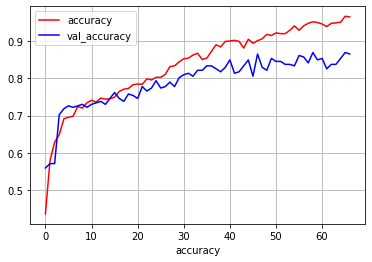

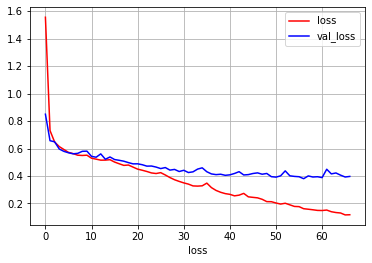

In [619]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'red')
    plt.plot(history.history['val_'+string], color = 'blue')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.grid()
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [620]:
y_pred = np.argmax(model.predict(X_train),axis=1)
y_pred

32/32 [==============================] - 0s 4ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [621]:
y_train

,class
1102,0
1147,0
1021,0
1194,0
1198,0
...,...
406,1
1176,0
649,0
1158,0


In [622]:
print("Evaluation model ann:")
print("Accuracy:", accuracy_score(y_train, y_pred))

Evaluation model ann:
Accuracy: 0.9513888888888888


In [623]:
print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       506
           1       0.95      0.95      0.95       502

    accuracy                           0.95      1008
   macro avg       0.95      0.95      0.95      1008
weighted avg       0.95      0.95      0.95      1008



In [624]:
print("Confusion Matrix:")
cm = confusion_matrix(y_train, y_pred)
cm

Confusion Matrix:


array([[481,  25],
       [ 24, 478]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

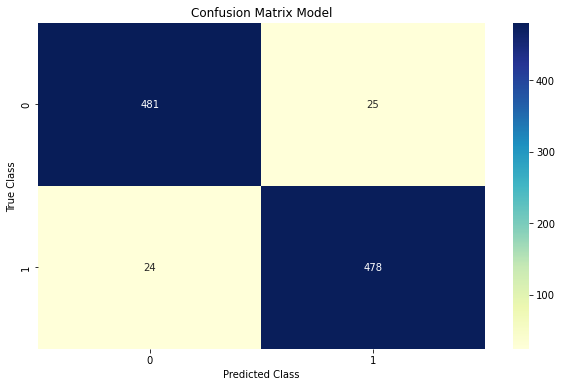

In [625]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap= 'YlGnBu')

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")

In [167]:
import pickle,os

In [168]:
os.makedirs('model', exist_ok=True)

In [169]:
filename = 'credit_customer.sav'
# Klasifikasi
pickle.dump(model, open(filename,"wb"))